# Aluno: Clésio de Araújo Gonçalves

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 1. Normalização dos dados

## 1.1 Dataset lojas

In [2]:
# Lendo o dataset de lojas e alterando o tipo de dados das colunas
arquivo_lojas = 'lojas.csv'
dataset_lojas = pd.read_csv(arquivo_lojas, 
dtype = {
    'Store': np.int32, 
    'StoreType': 'category',
    'Assortment': 'category',
    'CompetitionDistance': np.float32,
    'CompetitionOpenSinceMonth': np.float32,
    'CompetitionOpenSinceYear': np.float32,
    'Promo2': np.uint8,
    'Promo2SinceWeek': np.float32,
    'Promo2SinceYear': np.float32,
    'PromoInterval': 'category'
})
dataset_lojas.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [3]:
# Quantidade de linhas e colunas
dataset_lojas.shape

(1115, 10)

In [4]:
# Informações do sobre as colunas do dataset
dataset_lojas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Store                      1115 non-null   int32   
 1   StoreType                  1115 non-null   category
 2   Assortment                 1115 non-null   category
 3   CompetitionDistance        1112 non-null   float32 
 4   CompetitionOpenSinceMonth  761 non-null    float32 
 5   CompetitionOpenSinceYear   761 non-null    float32 
 6   Promo2                     1115 non-null   uint8   
 7   Promo2SinceWeek            571 non-null    float32 
 8   Promo2SinceYear            571 non-null    float32 
 9   PromoInterval              571 non-null    category
dtypes: category(3), float32(5), int32(1), uint8(1)
memory usage: 31.0 KB


In [5]:
dataset_lojas.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.900879,7.224704,2008.668823,0.512108,23.595446,2011.763550
std,322.01708,7663.176758,3.212349,6.195990,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [6]:
# Soma de valores nulos
dataset_lojas.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [7]:
# Verificando colunas afetadas quando Promo2 = 0
dataset_lojas[dataset_lojas['Promo2'] == 0].describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,544.000000,542.000000,396.000000,396.000000,544.0,0.0,0.0
mean,555.531250,6549.520508,7.260101,2009.123779,0.0,NaN,NaN
std,317.491536,9374.326172,3.176739,4.326814,0.0,NaN,NaN
min,1.000000,30.000000,1.000000,1990.000000,0.0,NaN,NaN
25%,280.250000,992.500000,4.000000,2006.000000,0.0,NaN,NaN
50%,559.000000,2640.000000,8.000000,2010.000000,0.0,NaN,NaN
75%,827.250000,8105.000000,10.000000,2013.000000,0.0,NaN,NaN
max,1114.000000,75860.000000,12.000000,2015.000000,0.0,NaN,NaN


In [8]:
# Ver comportamento da coluna PromoInterval quando Promo2 = 0
dataset_lojas[dataset_lojas['Promo2'] == 0].PromoInterval.unique()

[NaN]
Categories (0, object): []

In [9]:
# preenche com a Mediana dos valores das colunas com os valores NaN
dataset_lojas['CompetitionDistance'].fillna(dataset_lojas['CompetitionDistance'].median(), inplace=True)

# Preenche com zero os valores para as seguintes colunas:
dataset_lojas['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
dataset_lojas['CompetitionOpenSinceYear'].fillna(0, inplace=True)

# Se não houver promoção, as colunas Promo2SinceWeek, Promo2SinceYear e PromoInterval devem ter valores zero.
dataset_lojas['Promo2SinceWeek'].fillna(0, inplace=True)
dataset_lojas['Promo2SinceYear'].fillna(0, inplace=True)
dataset_lojas['PromoInterval'] = dataset_lojas['PromoInterval'].cat.add_categories([0]) # add categoria 0
dataset_lojas['PromoInterval'].fillna(0, inplace=True)

In [10]:
# Soma de valores nulos
dataset_lojas.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [11]:
# Converte dados categóricos para dados numericos
dataset_lojas = pd.DataFrame(pd.get_dummies(dataset_lojas, columns=["StoreType", "Assortment", "PromoInterval"]))

In [12]:
dataset_lojas

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_0
0,1,1270.0,9.0,2008.0,0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,1
1,2,570.0,11.0,2007.0,1,13.0,2010.0,1,0,0,0,1,0,0,0,1,0,0
2,3,14130.0,12.0,2006.0,1,14.0,2011.0,1,0,0,0,1,0,0,0,1,0,0
3,4,620.0,9.0,2009.0,0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,1
4,5,29910.0,4.0,2015.0,0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,1900.0,6.0,2014.0,1,31.0,2013.0,1,0,0,0,1,0,0,0,1,0,0
1111,1112,1880.0,4.0,2006.0,0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,1
1112,1113,9260.0,0.0,0.0,0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,1
1113,1114,870.0,0.0,0.0,0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,1


## 1.2 Dataset de treino

In [13]:
# Lendo o dataset de treino
arquivo_treino = 'dataset_treino.csv'
dataset_treino = pd.read_csv(arquivo_treino,
dtype = {
    'Store': np.int32, 
    'DayOfWeek': np.uint8,
    'Open': np.uint8,
    'Sales': np.int32,
    'Customers': np.int32,
    'Promo': np.uint8,
    'StateHoliday': 'category',
    'SchoolHoliday': np.uint8
}, parse_dates=['Date'])
dataset_treino.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,3,2014-12-31,2605,327,1,0,0,1
1,2,3,2014-12-31,2269,252,1,0,0,1
2,3,3,2014-12-31,3804,408,1,0,0,1
3,4,3,2014-12-31,10152,1311,1,0,0,1
4,5,3,2014-12-31,1830,217,1,0,0,1


In [14]:
# Quantidade de linhas e colunas
dataset_treino.shape

(780829, 9)

In [15]:
# Informações do sobre as colunas do dataset
dataset_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780829 entries, 0 to 780828
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store          780829 non-null  int32         
 1   DayOfWeek      780829 non-null  uint8         
 2   Date           780829 non-null  datetime64[ns]
 3   Sales          780829 non-null  int32         
 4   Customers      780829 non-null  int32         
 5   Open           780829 non-null  uint8         
 6   Promo          780829 non-null  uint8         
 7   StateHoliday   780829 non-null  category      
 8   SchoolHoliday  780829 non-null  uint8         
dtypes: category(1), datetime64[ns](1), int32(3), uint8(4)
memory usage: 18.6 MB


In [16]:
# Quebra a data em dia, mês e ano. E exclui a coluna Date
dataset_treino['Day']=dataset_treino.Date.dt.day
dataset_treino['Month']=dataset_treino.Date.dt.month
dataset_treino['Year']=dataset_treino.Date.dt.year
dataset_treino['WeekOfYear'] = dataset_treino.Date.dt.weekofyear
dataset_treino.drop(['Date'], axis=1, inplace=True)

In [17]:
# StateHoliday não está padronizada no dataset de teste e treinamento (não possui o tipo C). 
# Então resolvi mapear entre ser ou não feriado
dataset_treino['StateHoliday'] = dataset_treino['StateHoliday'].map({"0": 0, "a": 1, "b": 1, "c": 1})

In [18]:
# Conversão de tipos de dados para melhor uso da memória
dataset_treino.StateHoliday = dataset_treino.StateHoliday.astype(np.uint8)
dataset_treino.Day = dataset_treino.Day.astype(np.uint8)
dataset_treino.Month = dataset_treino.Month.astype(np.uint8)
dataset_treino.Year = dataset_treino.Year.astype(np.int32)

In [19]:
# Soma de valores nulos
dataset_treino.isnull().sum()

Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Day              0
Month            0
Year             0
WeekOfYear       0
dtype: int64

In [20]:
# Quantidade de lojas fechadas e sem vendas
dataset_treino[(dataset_treino.Open == 0) & (dataset_treino.Sales == 0)]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,WeekOfYear
2805,1,7,0,0,0,0,0,1,28,12,2014,52
2806,2,7,0,0,0,0,0,0,28,12,2014,52
2807,3,7,0,0,0,0,0,0,28,12,2014,52
2808,4,7,0,0,0,0,0,0,28,12,2014,52
2809,5,7,0,0,0,0,0,0,28,12,2014,52
...,...,...,...,...,...,...,...,...,...,...,...,...
780824,1111,2,0,0,0,0,1,1,1,1,2013,1
780825,1112,2,0,0,0,0,1,1,1,1,2013,1
780826,1113,2,0,0,0,0,1,1,1,1,2013,1
780827,1114,2,0,0,0,0,1,1,1,1,2013,1


In [21]:
# Lojas abertas com nehuma venda
dados = dataset_treino[(dataset_treino.Open != 0) & (dataset_treino.Sales == 0)]
print("Shape: ", dados.shape)
dados.head(7)

Shape:  (51, 12)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,WeekOfYear
85673,708,3,0,0,1,1,0,0,1,10,2014,40
93796,357,1,0,0,1,0,0,0,22,9,2014,39
103968,227,4,0,0,1,0,0,0,11,9,2014,37
104480,835,4,0,0,1,0,0,0,11,9,2014,37
105415,835,3,0,0,1,0,0,0,10,9,2014,37
109852,548,5,0,0,1,1,0,1,5,9,2014,36
110354,28,4,0,0,1,1,0,0,4,9,2014,36


In [22]:
# Exclui Vendas com valor 0
# Não excluí pois aumentou a taxa de erro

# ------------------------
# Retirando as lojas que não tiveram vendas e não abriram
# Só utilizarei pra treinamento as lojas abertas e que possuem vendas

# dataset_treino = dataset_treino[(dataset_treino["Open"] != 0) & (dataset_treino['Sales'] != 0)]

In [23]:
dataset_treino.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,WeekOfYear
count,780829.000000,780829.00000,780829.000000,780829.000000,780829.000000,780829.000000,780829.000000,780829.000000,780829.000000,780829.000000,780829.000000,780829.000000
mean,558.559818,3.99641,5742.206014,635.854196,0.830348,0.375633,0.029867,0.187542,15.715629,6.400120,2013.478792,25.899536
std,321.919437,1.99910,3852.310932,467.815283,0.375327,0.484286,0.170220,0.390346,8.793741,3.446416,0.499550,15.025218
min,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2013.000000,1.000000
25%,281.000000,2.00000,3683.000000,403.000000,1.000000,0.000000,0.000000,0.000000,8.000000,3.000000,2013.000000,13.000000
50%,558.000000,4.00000,5691.000000,611.000000,1.000000,0.000000,0.000000,0.000000,16.000000,6.000000,2013.000000,25.000000
75%,838.000000,6.00000,7811.000000,841.000000,1.000000,1.000000,0.000000,0.000000,23.000000,9.000000,2014.000000,39.000000
max,1115.000000,7.00000,38037.000000,7388.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,2014.000000,52.000000


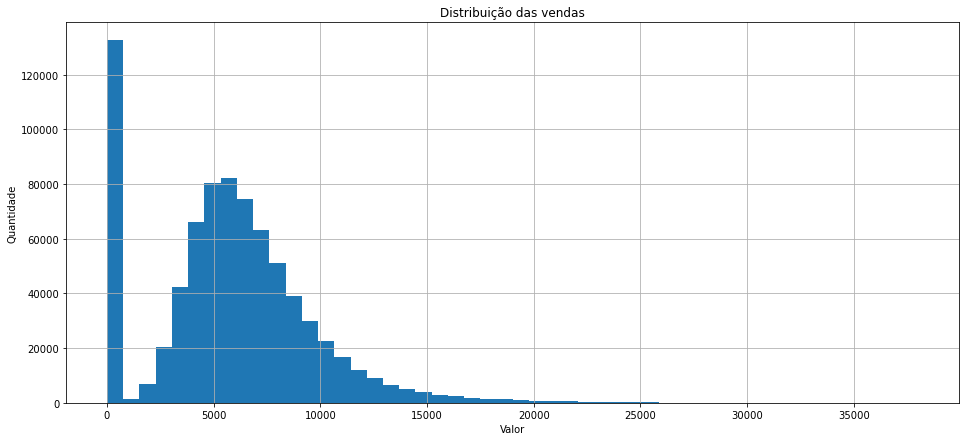

In [24]:
# Quantidade de vendas x valor das vendas
plt.figure(figsize = (16,7))
dataset_treino.Sales.hist(bins = 50)
plt.xlabel("Valor")
plt.ylabel("Quantidade")
plt.title("Distribuição das vendas")
plt.show()

In [25]:
# Quantidade de Vendas com valor 0 quando a loja esteja fechada
dataset_treino[dataset_treino.Open == 0].Sales.count()

132469

In [26]:
# Correlação das colunas de treino
correlacao = pd.DataFrame(dataset_treino.loc[:, ['DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 
                                                 'StateHoliday', 'SchoolHoliday', 'Month', 
                                                 'Year', 'Day']].corr())

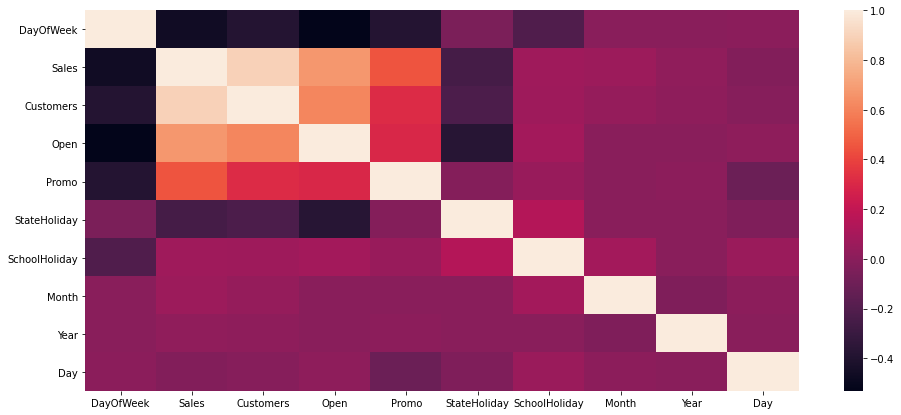

In [27]:
# Correlação dataset de treino
# Correlação muito alta entre Sales e Customers.
# No geral, quanto mais clientes maiores as vendas
plt.figure(figsize = (16,7))
sns.heatmap(data=correlacao)
plt.show()

## 1.3 Dataset de teste

In [28]:
# Lendo o dataset de teste
arquivo_teste = 'dataset_teste.csv'
dataset_teste = pd.read_csv(arquivo_teste,
dtype = {
    'Id': np.int32,
    'Store': np.int32, 
    'DayOfWeek': np.uint8,
    'Open': np.uint8,
    'Promo': np.uint8,
    'StateHoliday': 'category',
    'SchoolHoliday': np.uint8
}, parse_dates=['Date'])

dataset_teste.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,5,2015-07-31,1,1,0,1
1,2,2,5,2015-07-31,1,1,0,1
2,3,3,5,2015-07-31,1,1,0,1
3,4,4,5,2015-07-31,1,1,0,1
4,5,5,5,2015-07-31,1,1,0,1


In [29]:
# Quantidade de linhas e colunas
dataset_teste.shape

(236380, 8)

In [30]:
# Informações do sobre as colunas do dataset
dataset_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236380 entries, 0 to 236379
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Id             236380 non-null  int32         
 1   Store          236380 non-null  int32         
 2   DayOfWeek      236380 non-null  uint8         
 3   Date           236380 non-null  datetime64[ns]
 4   Open           236380 non-null  uint8         
 5   Promo          236380 non-null  uint8         
 6   StateHoliday   236380 non-null  category      
 7   SchoolHoliday  236380 non-null  uint8         
dtypes: category(1), datetime64[ns](1), int32(2), uint8(4)
memory usage: 4.7 MB


In [31]:
# Quebra a data em dia, mês e ano. E exclui a coluna Date
dataset_teste['Day'] = dataset_teste.Date.dt.day
dataset_teste['Month'] = dataset_teste.Date.dt.month
dataset_teste['Year'] = dataset_teste.Date.dt.year
dataset_teste['WeekOfYear'] = dataset_teste.Date.dt.weekofyear
dataset_teste.drop(['Date'], axis=1, inplace=True)

In [32]:
# StateHoliday não está padronizada no dataset de teste e treinamento (não possui o tipo C). 
# Então resolvi mapear entre ser ou não feriado
dataset_teste['StateHoliday'] = dataset_teste['StateHoliday'].map({"0": 0, "a": 1, "b": 1, "c": 1})

In [33]:
# Conversão de tipos de dados para melhor uso da memória
dataset_teste.StateHoliday = dataset_teste.StateHoliday.astype(np.uint8)
dataset_teste.Day = dataset_teste.Day.astype(np.uint8)
dataset_teste.Month = dataset_teste.Month.astype(np.uint8)
dataset_teste.Year = dataset_teste.Year.astype(np.int32)

In [34]:
# Soma de valores nulos
dataset_teste.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Day              0
Month            0
Year             0
WeekOfYear       0
dtype: int64

In [35]:
dataset_teste.describe()

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,WeekOfYear
count,236380.000000,236380.000000,236380.000000,236380.000000,236380.000000,236380.000000,236380.000000,236380.000000,236380.000000,236380.0,236380.000000
mean,118190.500000,558.000000,4.004717,0.829309,0.400943,0.032697,0.149264,15.660377,4.018868,2015.0,16.070755
std,68237.172653,321.873326,1.991727,0.376240,0.490091,0.177844,0.356349,8.767332,2.004627,0.0,8.750743
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2015.0,1.000000
25%,59095.750000,279.000000,2.000000,1.000000,0.000000,0.000000,0.000000,8.000000,2.000000,2015.0,8.750000
50%,118190.500000,558.000000,4.000000,1.000000,0.000000,0.000000,0.000000,16.000000,4.000000,2015.0,16.000000
75%,177285.250000,837.000000,6.000000,1.000000,1.000000,0.000000,0.000000,23.000000,6.000000,2015.0,24.000000
max,236380.000000,1115.000000,7.000000,1.000000,1.000000,1.000000,1.000000,31.000000,7.000000,2015.0,31.000000


In [36]:
# Quandtidade de lojas fechadas (por isso não exclui as vendas com valor zero no dataset_treino)
dataset_teste[dataset_teste.Open == 0].Open.count()

40348

# 2. Merge nos conjuntos de dados

## 2.1 Merge no dataset de treinamento

In [37]:
dataset_lojas

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_0
0,1,1270.0,9.0,2008.0,0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,1
1,2,570.0,11.0,2007.0,1,13.0,2010.0,1,0,0,0,1,0,0,0,1,0,0
2,3,14130.0,12.0,2006.0,1,14.0,2011.0,1,0,0,0,1,0,0,0,1,0,0
3,4,620.0,9.0,2009.0,0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,1
4,5,29910.0,4.0,2015.0,0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,1900.0,6.0,2014.0,1,31.0,2013.0,1,0,0,0,1,0,0,0,1,0,0
1111,1112,1880.0,4.0,2006.0,0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,1
1112,1113,9260.0,0.0,0.0,0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,1
1113,1114,870.0,0.0,0.0,0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,1


In [38]:
dataset_treino

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,WeekOfYear
0,1,3,2605,327,1,0,0,1,31,12,2014,1
1,2,3,2269,252,1,0,0,1,31,12,2014,1
2,3,3,3804,408,1,0,0,1,31,12,2014,1
3,4,3,10152,1311,1,0,0,1,31,12,2014,1
4,5,3,1830,217,1,0,0,1,31,12,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...
780824,1111,2,0,0,0,0,1,1,1,1,2013,1
780825,1112,2,0,0,0,0,1,1,1,1,2013,1
780826,1113,2,0,0,0,0,1,1,1,1,2013,1
780827,1114,2,0,0,0,0,1,1,1,1,2013,1


In [39]:
# Merge entre dataset_lojas e dataset_treino
dataset_treino = pd.merge(dataset_treino, dataset_lojas, on='Store')

In [40]:
# Duração de tempo em que a competidora ficou aberta (em meses)
dataset_treino['CompetitionOpenSince'] = np.where(
    (dataset_treino.CompetitionOpenSinceYear == 0), 0,
    (12 * (dataset_treino.Year - dataset_treino.CompetitionOpenSinceYear) + 
    (dataset_treino.Month - dataset_treino.CompetitionOpenSinceMonth))
)

dataset_treino.drop(['CompetitionOpenSinceYear'], axis=1, inplace=True)
dataset_treino.drop(['CompetitionOpenSinceMonth'], axis=1, inplace=True)

# Zera a duração de tempo de CompetitionOpenSince negativa 
# (a competidora abriu em data futura da venda da loja atual)
dataset_treino.CompetitionOpenSince[dataset_treino['CompetitionOpenSince'] < 0] = 0

In [41]:
# Duração de tempo em que a loja participa da promoção (em meses)
dataset_treino['Promo2Since'] = np.where(
    (dataset_treino.Promo2SinceYear == 0), 0,
    (12 * (dataset_treino.Year - dataset_treino.Promo2SinceYear) + 
    (dataset_treino.WeekOfYear - dataset_treino.Promo2SinceWeek) / 4.0)
)
dataset_treino.drop(['Promo2SinceYear'], axis=1, inplace=True)
dataset_treino.drop(['Promo2SinceWeek'], axis=1, inplace=True)

# Zera a duração de tempo de Promo2Since negativa 
# (a loja começou a participar da Promo2 em data futura da venda)
dataset_treino.Promo2Since[dataset_treino['Promo2Since'] < 0] = 0

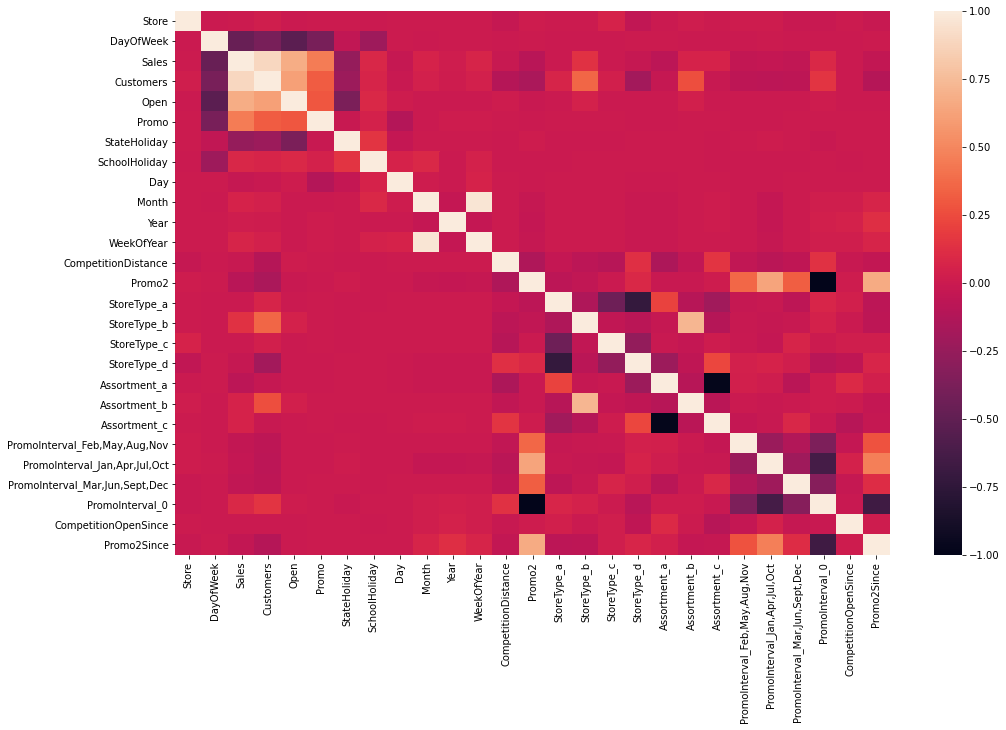

In [42]:
# Correlação
plt.figure(figsize = (16,10))
sns.heatmap(data=dataset_treino.corr())
plt.show()

## 2.2 Merge no dataset de teste

In [43]:
# Merge dataset_teste e dataset_lojas
dataset_teste = pd.merge(dataset_teste, dataset_lojas, on='Store')

In [44]:
# Duração de tempo em que a competidora ficou aberta (em meses)
dataset_teste['CompetitionOpenSince'] = np.where(
    (dataset_teste.CompetitionOpenSinceYear == 0), 0,
    (12 * (dataset_teste.Year - dataset_teste.CompetitionOpenSinceYear) + 
    (dataset_teste.Month - dataset_teste.CompetitionOpenSinceMonth))
)

dataset_teste.drop(['CompetitionOpenSinceYear'], axis=1, inplace=True)
dataset_teste.drop(['CompetitionOpenSinceMonth'], axis=1, inplace=True)

# Zera a duração de tempo de CompetitionOpenSince negativa 
# (a competidora abriu em data futura da venda da loja atual)
dataset_teste.CompetitionOpenSince[dataset_teste['CompetitionOpenSince'] < 0] = 0

In [45]:
# Duração de tempo em que a loja participa da promoção (em meses)
dataset_teste['Promo2Since'] = np.where(
    (dataset_teste.Promo2SinceYear == 0), 0,
    (12 * (dataset_teste.Year - dataset_teste.Promo2SinceYear) + 
    (dataset_teste.WeekOfYear - dataset_teste.Promo2SinceWeek) / 4.0)
)
dataset_teste.drop(['Promo2SinceYear'], axis=1, inplace=True)
dataset_teste.drop(['Promo2SinceWeek'], axis=1, inplace=True)

# Zera a duração de tempo de Promo2Since negativa 
# (a loja começou a participar da Promo2 em data futura da venda)
dataset_teste.Promo2Since[dataset_teste['Promo2Since'] < 0] = 0

# 3. Regressão no dataset de treino

In [46]:
# # Normalização dos dados de X
# from sklearn import preprocessing

# dataset_treino_values = dataset_treino.values 
# min_max_scaler = preprocessing.MinMaxScaler()
# dataset_treino_escalado = min_max_scaler.fit_transform(dataset_treino_values)
# dataset_treino = pd.DataFrame(dataset_treino_escalado)

In [47]:
dataset_treino

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,...,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_0,CompetitionOpenSince,Promo2Since
0,1,3,2605,327,1,0,0,1,31,12,...,0,1,0,0,0,0,0,1,75.0,0.00
1,1,2,6466,703,1,0,0,1,30,12,...,0,1,0,0,0,0,0,1,75.0,0.00
2,1,1,6463,700,1,0,0,1,29,12,...,0,1,0,0,0,0,0,1,75.0,0.00
3,1,7,0,0,0,0,0,1,28,12,...,0,1,0,0,0,0,0,1,75.0,0.00
4,1,6,6057,684,1,0,0,1,27,12,...,0,1,0,0,0,0,0,1,75.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780824,1109,6,2897,279,1,0,0,0,5,1,...,0,1,0,0,0,1,0,0,21.0,6.75
780825,1109,5,3596,384,1,0,0,1,4,1,...,0,1,0,0,0,1,0,0,21.0,6.75
780826,1109,4,3654,392,1,0,0,1,3,1,...,0,1,0,0,0,1,0,0,21.0,6.75
780827,1109,3,4576,444,1,0,0,1,2,1,...,0,1,0,0,0,1,0,0,21.0,6.75


In [48]:
# Definindo atributos para X_treino
# Definir colunas que irão compor X_teste
X = dataset_treino.drop(['Customers', 'Sales'], axis = 1)

In [49]:
# Definindo Y_treino
Y = dataset_treino.Sales

## 3.1 Regressão Linear: mesmo conjunto de dados

In [50]:
# Importando o módulo de Regressão Linear do scikit-learn e metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [51]:
# Cria o modelo de regressão linear
modelo_linear = LinearRegression()

In [52]:
# Treinando o modelo
modelo_linear.fit(X, Y)

LinearRegression()

In [53]:
# Prevendo o Sales de X_treino
predicao_linear = modelo_linear.predict(X)

In [54]:
# Calcular o MSE (Mean Squared Error)
print("MSE: ", np.mean((Y - predicao_linear) ** 2))
print("R2 Score: ", r2_score(Y, predicao_linear))

MSE:  6490101.844983804
R2 Score:  0.5626698672901074


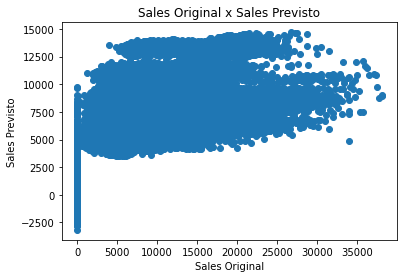

In [55]:
# Comparando Vendas originais x Vendas previstas
plt.scatter(Y, predicao_linear)
plt.xlabel("Sales Original")
plt.ylabel("Sales Previsto")
plt.title("Sales Original x Sales Previsto")
plt.show()

In [56]:
# Aplicação da função logaritma nos dados de X e Y
X = np.log1p(X)
Y = np.log1p(Y)

In [57]:
X.head()

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,WeekOfYear,...,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_0,CompetitionOpenSince,Promo2Since
0,0.693147,1.386294,0.693147,0.0,0.0,0.693147,3.465736,2.564949,7.608374,0.693147,...,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.693147,4.330733,0.0
1,0.693147,1.098612,0.693147,0.0,0.0,0.693147,3.433987,2.564949,7.608374,0.693147,...,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.693147,4.330733,0.0
2,0.693147,0.693147,0.693147,0.0,0.0,0.693147,3.401197,2.564949,7.608374,0.693147,...,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.693147,4.330733,0.0
3,0.693147,2.079442,0.000000,0.0,0.0,0.693147,3.367296,2.564949,7.608374,3.970292,...,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.693147,4.330733,0.0
4,0.693147,1.945910,0.693147,0.0,0.0,0.693147,3.332205,2.564949,7.608374,3.970292,...,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.693147,4.330733,0.0


In [58]:
X.describe()

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,WeekOfYear,...,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_0,CompetitionOpenSince,Promo2Since
count,780829.000000,780829.000000,780829.000000,780829.000000,780829.000000,780829.000000,780829.000000,780829.000000,780829.000000,780829.000000,...,780829.000000,780829.000000,780829.000000,780829.000000,780829.000000,780829.000000,780829.000000,780829.000000,780829.000000,780829.000000
mean,6.027556,1.514291,0.575554,0.260369,0.020702,0.129994,2.614875,1.864259,7.608116,3.052992,...,0.212283,0.365495,0.005669,0.321984,0.080813,0.197161,0.066567,0.348605,2.210764,1.272594
std,0.972221,0.455645,0.260157,0.335682,0.117988,0.270567,0.716126,0.562606,0.000248,0.798341,...,0.319499,0.346057,0.062428,0.345700,0.222452,0.312713,0.204230,0.346568,2.054212,1.618064
min,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,7.607878,0.693147,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.641907,1.098612,0.693147,0.000000,0.000000,0.000000,2.197225,1.386294,7.607878,2.639057,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.326149,1.609438,0.693147,0.000000,0.000000,0.000000,2.833213,1.945910,7.607878,3.258097,...,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,2.564949,0.000000
75%,6.732211,1.945910,0.693147,0.693147,0.000000,0.000000,3.178054,2.302585,7.608374,3.688879,...,0.693147,0.693147,0.000000,0.693147,0.000000,0.693147,0.000000,0.693147,4.248495,3.113515
max,7.017506,2.079442,0.693147,0.693147,0.693147,0.693147,3.465736,2.564949,7.608374,3.970292,...,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,7.225481,4.193435


## 3.2 Regressão Polinomial: mesmo conjunto de dados

In [59]:
# Regressão Polinomial
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2

modelo_polinomial = make_pipeline(PolynomialFeatures(degree), Ridge())
modelo_polinomial.fit(X, Y)
predicao_polinominal = modelo_polinomial.predict(X)

print("Mean squared error = ", np.mean((Y - predicao_polinominal) ** 2))
print("R2 Score: ", r2_score(Y, predicao_polinominal))

Mean squared error =  0.11051689017171355
R2 Score:  0.9898997187573939


## 3.3 Regressão Polinomial (validação): separando conjunto de dados em Treino e Teste

In [60]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.33)

print('Tamanho conjunto de treino: ', X_treino.shape)
print('Tamanho conjunto de teste: ', X_teste.shape)

Tamanho conjunto de treino:  (523155, 25)
Tamanho conjunto de teste:  (257674, 25)


In [61]:
modelo_polinomial_dividido = make_pipeline(PolynomialFeatures(degree), Ridge())
modelo_polinomial_dividido.fit(X_treino, Y_treino)
predicao_polinominal_treino = modelo_polinomial_dividido.predict(X_treino)
predicao_polinominal_teste = modelo_polinomial_dividido.predict(X_teste)

print("Mean squared error = ", np.mean((Y_teste - predicao_polinominal_teste) ** 2))
print("R2 Score: ", r2_score(Y_teste, predicao_polinominal_teste))

Mean squared error =  0.1103652732274475
R2 Score:  0.9899516902213723


# 4. Predição no dataset de teste e publicação do resultado

In [62]:
# Definindo atributos para X_teste
X2 = np.log1p(dataset_teste.drop(['Id'], axis = 1))

In [63]:
X.shape

(780829, 25)

In [64]:
X2.shape

(236380, 25)

In [65]:
# Predição para o dataset_teste utilizando o modelo_polinomial
# Não é necessário fazer o fit, pois o fit foi feito em X (database_treino)
predicao_polinominal_teste = modelo_polinomial.predict(X2)

In [66]:
# Juntanto a predição em um data frame
resultado_teste = pd.DataFrame({'Id': dataset_teste['Id'], 'Sales': np.expm1(predicao_polinominal_teste)})
resultado_teste.head(20)

,Id,Sales
0,1,6417.363418
1,1116,6407.006206
2,2231,6486.026610
3,3346,6742.899015
4,4461,7441.796870
5,5576,-0.079726
6,6691,5186.652454
7,7806,5017.756919
8,8921,4871.968593
9,10036,4766.573451


In [67]:
# Ordenando os dados do resultado da predição do dataset de teste
resultado_teste = resultado_teste.sort_values(by = ['Id'])

In [68]:
# Exportando os resultados para o CSV
resultado_teste.to_csv("Predicao_Clesio_de_Araujo_Goncalves.csv", header = True, index = False)